In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.model_selection import train_test_split, GridSearchCV
from load_data import load_categorical_data
from load_data import load_categorical_more_data
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import r2_score
from scipy.stats import ttest_ind as ttest
from sklearn.metrics import mean_squared_error
import time

In [2]:
"""
Use Decision Tree to fit the relationship between 
homeless_real_value and other variables, except 
no_longer_homeless, prevention_duty, and relief duty.
"""

#Read data
categorical_data,local_authority_names,total_duty_owed,total_population_in_households,prevention_duty_owed,relief_duty_owed,support_need_homeless,no_longer_homeless,homeless_real_value,categorical_waiting_list_size,social_housing_lettings_2021,band_A_B_properties,band_C_D_properties,band_E_F_properties,band_G_H_properties,median_prices,median_earning_gross,categorical_median_afforability_ratio,lower_quatile_prices,lower_quatile_earning_gross,categorical_lower_quatile_afforability_ratio = load_categorical_data()

affordableRent_start,social_housing_start,intermediate_start,total_affordable_start,affordable_complete,social_complete,intermediate_complete,total_affordable_complete=load_categorical_more_data()

In [3]:
# features include duty owed
X = pd.DataFrame([total_duty_owed,\
                  total_population_in_households,\
                  support_need_homeless,\
                  categorical_waiting_list_size,\
                  social_housing_lettings_2021,band_A_B_properties,\
                  band_C_D_properties,band_E_F_properties,band_G_H_properties,\
                  median_prices,median_earning_gross,categorical_median_afforability_ratio,\
                  lower_quatile_prices,lower_quatile_earning_gross,\
                  categorical_lower_quatile_afforability_ratio,\
                  affordableRent_start,social_housing_start,\
                  intermediate_start,total_affordable_start,\
                  affordable_complete,social_complete,intermediate_complete,\
                  total_affordable_complete])

In [4]:
# features without duty owed
X = pd.DataFrame([total_population_in_households,\
                  support_need_homeless,\
                  categorical_waiting_list_size,\
                  social_housing_lettings_2021,band_A_B_properties,\
                  band_C_D_properties,band_E_F_properties,band_G_H_properties,\
                  median_prices,median_earning_gross,categorical_median_afforability_ratio,\
                  lower_quatile_prices,lower_quatile_earning_gross,\
                  categorical_lower_quatile_afforability_ratio,\
                  affordableRent_start,social_housing_start,\
                  intermediate_start,total_affordable_start,\
                  affordable_complete,social_complete,intermediate_complete,\
                  total_affordable_complete])

In [5]:
data_table = categorical_data.drop(labels='Local',axis = 1)
data_table = data_table.drop(labels='Local Authority code',axis = 1)
data_table = data_table.drop(labels='Local Authority name',axis = 1)
data_table = data_table.drop(labels='Total owed a prevention or relief duty',axis = 1)
data_table = data_table.drop(labels='Threatened with homelessness within 56 days - Prevention duty owed',axis = 1)
data_table = data_table.drop(labels='Homeless - Relief duty owed4',axis = 1)
data_table = data_table.drop(labels='Intermediate Rent (Starts on Site)',axis = 1)
data_table = data_table.drop(labels='Intermediate Rent (Completions)',axis = 1)
data_table = data_table.drop(labels='Affordable Home Ownership (Starts on Site)',axis = 1)
data_table = data_table.drop(labels='Affordable Home Ownership (Completions)',axis = 1)
data_table = data_table.drop(labels='Market (Starts on Site)',axis = 1)
data_table = data_table.drop(labels='Market  (Completions)',axis = 1)
data_table = data_table.drop(labels='C_D_property_counts',axis = 1)
data_table = data_table.drop(labels='E_F_property_counts',axis = 1)
data_table = data_table.drop(labels='G_H_property_counts',axis = 1)
data_table = data_table.drop(labels='median_houses_2020',axis = 1)
data_table = data_table.drop(labels='median_earning_2020',axis = 1)
data_table = data_table.drop(labels='ratio_by_medians_2020',axis = 1)

In [6]:
data_table.columns

Index(['Number of households in area4 (000s)',
       'Total households with support needs', 'Total secured accommodation',
       'Homeless (including intentionally homeless)',
       'Size_of_social_housing_waiting_list_2021', '2021 Total Lettings',
       'Affordable Rent (Starts on Site)', 'Social Rent (Starts on Site)',
       'Total Affordable (Starts on Site)', 'Affordable Rent (Completions)',
       'Social Rent (Completions)', 'Total Affordable (Completions)',
       'Total (Starts on Site)', 'Total (Completions)', 'A_B_property_counts',
       'lower_quatile_houses_2020', 'lower_quatile_earning_2020',
       'ratio_by_lower_quatile_2020'],
      dtype='object')

In [7]:
feature_space = data_table.iloc[:, data_table.columns != 'Homeless (including intentionally homeless)'].astype('float')
feature_class = data_table.iloc[:, data_table.columns == 'Homeless (including intentionally homeless)'].astype('float')

In [8]:
training_set, test_set, class_set, test_class_set = train_test_split(feature_space,
                                                                    feature_class,
                                                                    test_size = 0.20, 
                                                                    random_state = 0)

# Cleaning test sets to avoid future warning messages
normal_class_set = class_set
class_set = normal_class_set.values.ravel() 
normal_test_class_set = test_class_set
test_class_set = normal_test_class_set.values.ravel() 

In [9]:
# Set the random state for reproducibility
fit_rf = RandomForestClassifier(random_state=0)

In [20]:
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [2, 3, 4],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 7,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(training_set, class_set)
print('Best Parameters using grid search: \n', 
      cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(


Best Parameters using grid search: 
 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 4, 'max_features': None}
Time taken in grid search:  31.70


In [10]:
# Set best parameters given by grid search 
fit_rf = fit_rf.set_params(criterion = 'entropy',
                  max_features = None, 
                  max_depth = 4)

In [11]:
hundredYard_forest = fit_rf.fit(training_set, class_set)

In [12]:
predictions = hundredYard_forest.predict(test_set)

In [13]:
feature_importance_score = list(hundredYard_forest.feature_importances_)

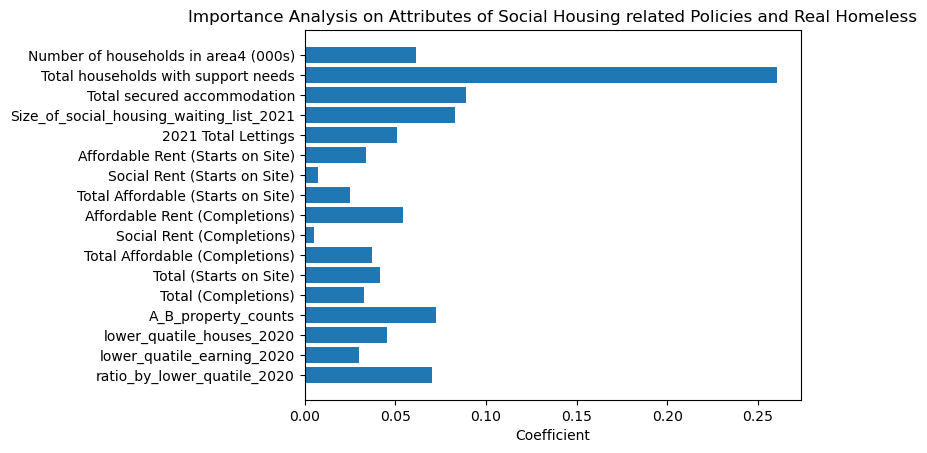

In [14]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
x_names = list(hundredYard_forest.feature_names_in_[:])
y_pos = np.arange(len(x_names))

ax.barh(y_pos, feature_importance_score, align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_yticks(y_pos)
ax.set_yticklabels(list(x_names))
ax.set_xlabel('Coefficient')
ax.set_title('Importance Analysis on Attributes of Social Housing related Policies and Real Homeless')
plt.savefig('Figure/random_forest_importance_score_analysis.png')
plt.show()

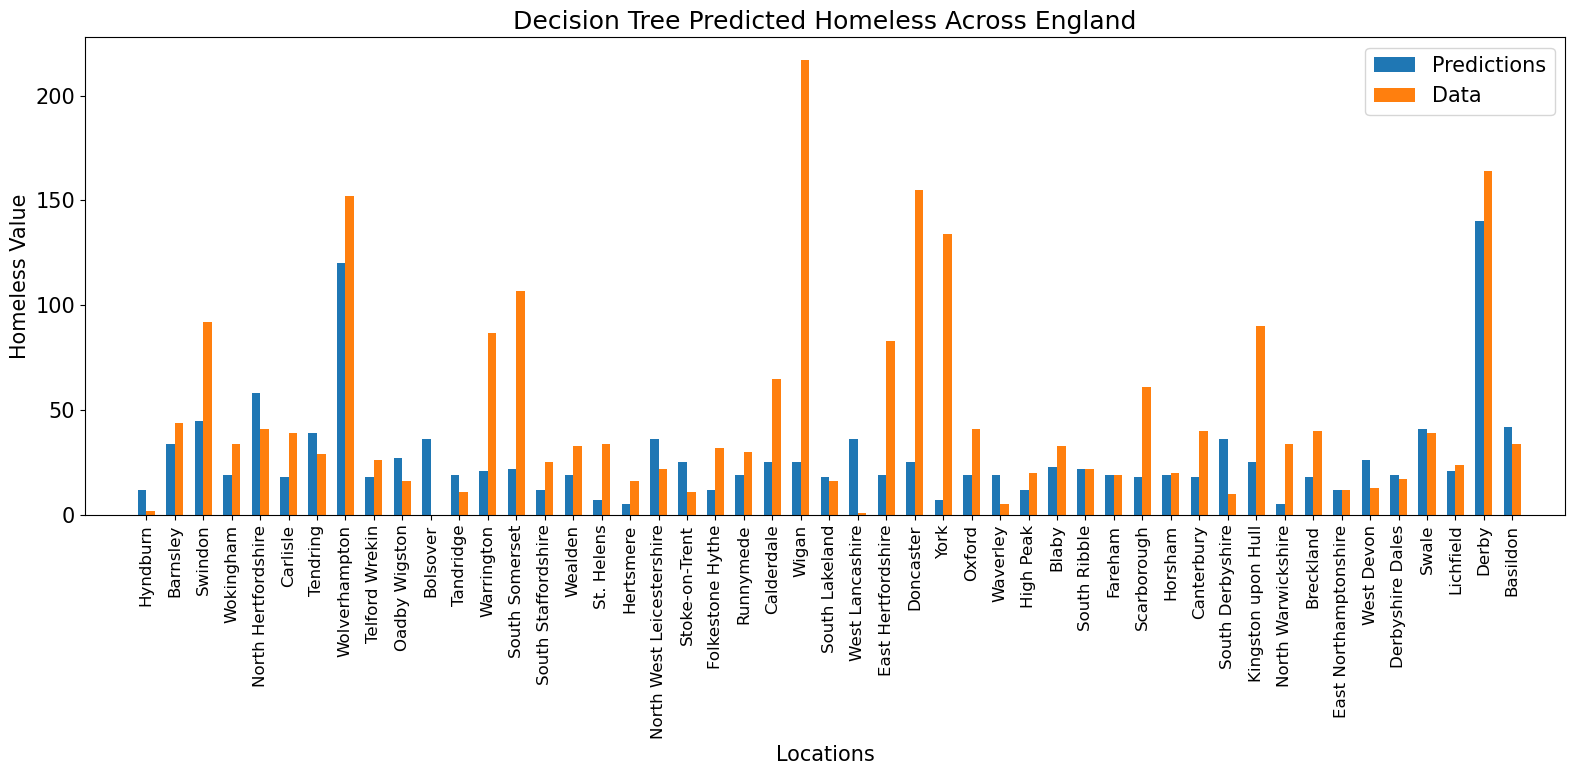

In [15]:
#Plot and save the test results
f_predictions = predictions
test_y = test_class_set

N =len(f_predictions)
locations = range(1,N+1)

# Position of bars on x-axis
y_pos = np.arange(N)

# Width of a bar 
width = 0.3

# Plotting
plt.rcParams.update({'font.size': 15})
fig_r2, ax = plt.subplots(figsize=(16,8))
plt.bar(y_pos, f_predictions, width, label='Predictions')
plt.bar(y_pos + width, test_y, width, label='Data')
plt.xlabel('Locations')
plt.ylabel('Homeless Value')
plt.title('Decision Tree Predicted Homeless Across England')

# xticks()
plt.xticks(y_pos + width / 2, list(local_authority_names[normal_test_class_set.index]))
plt.setp(ax.get_xticklabels(), fontsize=12, rotation='vertical')

# Size of the Plot
plt.xlim([-2,max(y_pos)+2])

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('Figure/Random_forest_test_result.png')
plt.show()